# Motivation

In the Kitaev ladder, there is an interesting fact that the levels of specific `D`'s cross each other at some specific system size $N$.

In [1]:
from Majorana import get_lowest_E, get_Majorana_spectrum

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Jx = 1.75
Jy = 0.25
Jz = 1.0

In [4]:
N = 10
D_list = [1 for i in range(N*2)]

In [5]:
get_lowest_E(Jx, Jy, Jz, N, D_list, bc='open')

[-36.97549054550811, -36.97549054550811]

A realistic issue is that we cannot simply list all the `D` configuration since the set of all `D` increases along with the system size.

Therefore, we only consider some representative `D`, such as all positive but the middle one flipped, also one of the important low-lying states.

But to demonstrate that this choice is reasonable, we still need to plot the lowest energies of some different `D`'s; up to now we haven't found an explicit expression for directly calculating the energies of arbitrary `D` energies.

In [6]:
def get_Majorana_first_excitation_OBC(Jx, Jy, Jz, N, D_list):
    bc = 'open'
    spec = get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY=1, D_list=D_list, bc=bc)
    return np.sum(spec) - 2*np.max(spec)

def get_GS_OBC(Jx, Jy, Jz, N, D_list):
    bc = 'open'
    spec = get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY=1, D_list=D_list, bc=bc)
    return np.sum(spec)
    

In [29]:
def show_different_D_energies(Jx, Jy, Jz, N_list = range(2, 11), bc='open'):
    # here we choose different D as: 1. all positive; 2. all negative; 3. middle flipped; 4. first flipped
    
    def D_list_1(N):
        return [1 for i in range(2*N)]
    def D_list_2(N):
        return [-1 for i in range(2*N)]
    def D_list_3(N):
        D_list = [1 for i in range(2*N)]
        D_list[N-1] *= -1
        return D_list
    def D_list_4(N):
        D_list = [1 for i in range(2*N)]
        D_list[0] *= -1
        return D_list
    
    D_list_func_list = [D_list_1, D_list_2, D_list_3, D_list_4]
    color_dic = ['red', 'green', 'blue', 'yellow']
    label_dic = ['Positive', 'Negative', 'Middle', 'First']
    
    for i in range(4):
        data = [get_lowest_E(Jx, Jy, Jz, N, D_list_func_list[i](N), bc=bc)[0]-get_lowest_E(Jx, Jy, Jz, N, D_list_1(N), bc=bc)[0] for N in N_list]
        color = color_dic[i]
        label = label_dic[i]
        plt.plot(N_list, data, 'o', c=color, label=label)
        
    
#     color_dic = ['pink', 'cyan', 'purple', 'orange']
    label_dic = ['Positive, 1st', 'Negative, 1st', 'Middle, 1st', 'First, 1st']
    for i in range(4):
        data = [get_Majorana_first_excitation_OBC(Jx, Jy, Jz, N, D_list_func_list[i](N))-get_lowest_E(Jx, Jy, Jz, N, D_list_1(N), bc=bc)[0] for N in N_list]
        color = color_dic[i]
        label = label_dic[i]
        plt.plot(N_list, data, '^', c=color, label=label)
    
    plt.xticks(N_list)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

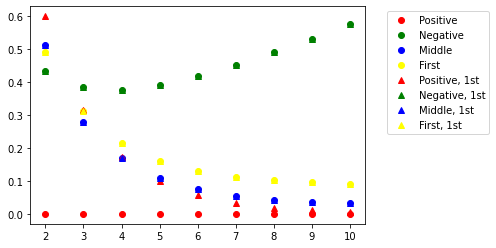

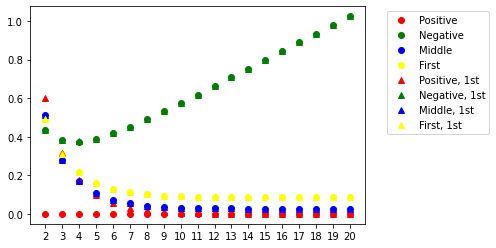

In [33]:
Jx = 1.75
Jy = 0.25
Jz = 1.0

show_different_D_energies(Jx, Jy, Jz, N_list = range(2, 11), bc='open')
show_different_D_energies(Jx, Jy, Jz, N_list = range(2, 21), bc='open')

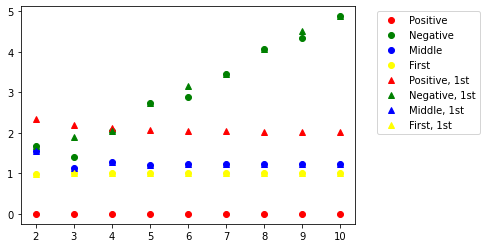

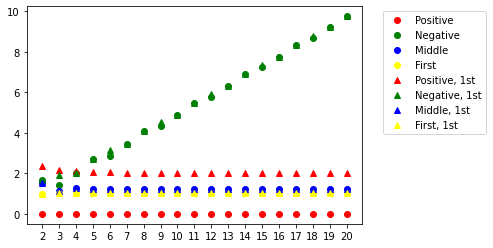

In [34]:
Jx = 1.0
Jy = 1.0
Jz = 1.0

show_different_D_energies(Jx, Jy, Jz, N_list = range(2, 11), bc='open')
show_different_D_energies(Jx, Jy, Jz, N_list = range(2, 21), bc='open')

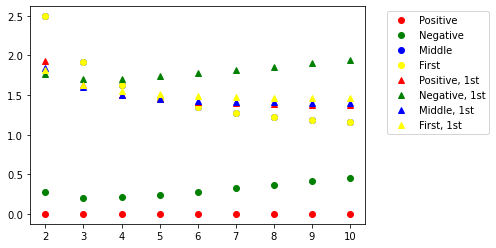

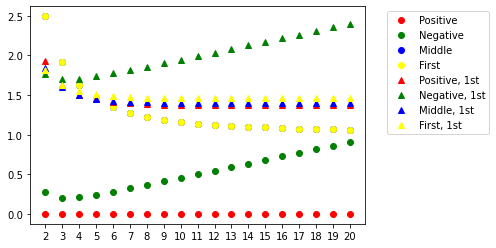

In [35]:
Jx = 1.75
Jy = 0.25
Jz = 1.0

show_different_D_energies(Jx, Jy, Jz, N_list = range(2, 11), bc='periodic')
show_different_D_energies(Jx, Jy, Jz, N_list = range(2, 21), bc='periodic')

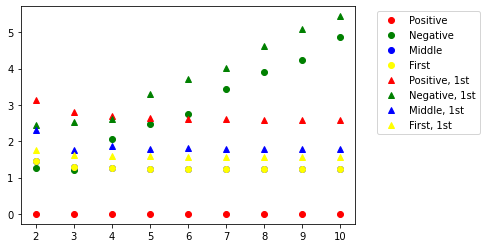

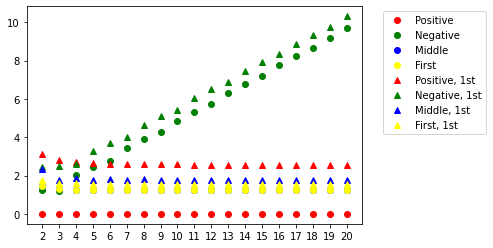

In [36]:
Jx = 1.0
Jy = 1.0
Jz = 1.0

show_different_D_energies(Jx, Jy, Jz, N_list = range(2, 11), bc='periodic')
show_different_D_energies(Jx, Jy, Jz, N_list = range(2, 21), bc='periodic')

In [42]:
N = 3

D_list = [1 for i in range(2*N)]
get_GS_OBC(Jx, Jy, Jz, N, D_list)


-10.255626493682414

In [43]:
get_Majorana_first_excitation_OBC(Jx, Jy, Jz, N, D_list)

-9.94121280612163

In [44]:
D_list_middle = D_list.copy()
D_list_middle[N-1]*= -1
get_GS_OBC(Jx, Jy, Jz, N, D_list_middle)


-10.166135975156326

In [45]:
D_list_middle = D_list.copy()
D_list_middle[N]*= -1
get_GS_OBC(Jx, Jy, Jz, N, D_list_middle)


-10.167422784783286

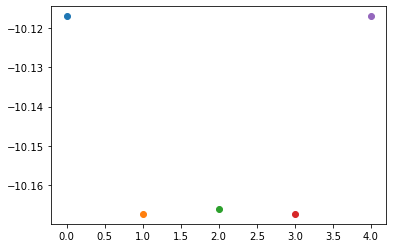

In [54]:
N = 3
D_list = [1 for i in range(2*N)]

for i in range(2*N-1):
    D_list_flipped = D_list.copy()
    D_list_flipped[i] *= -1
    plt.plot(i, get_GS_OBC(Jx, Jy, Jz, N, D_list_flipped), 'o')